In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def new_funct(x,y):
    return (50/9)*(np.square(x)+np.square(y))**3 -(209/18)*(np.square(x)+np.square(y))**2+(59/9)*(np.square(x)+np.square(y))
    
def grad_new_funct(x,y):
    gx = (100/3)*x*(np.square(x)+np.square(y))**2 - (418/9)*x*(np.square(x)+np.square(y)) + (118/9)*x
    gy = (100/3)*y*(np.square(x)+np.square(y))**2 - (418/9)*y*(np.square(x)+np.square(y)) + (118/9)*y
    return np.array([gx,gy])
    

In [ ]:
def gradient_descent(grad_fn, x, y, typ, gamma=0.000013, tolr=0.00001, max_itrs=100000):
    
    i = 0
    itr_x, itr_y, itr_count = [], [], []
    X = np.array([x,y])

    if typ == 'vanilla':
        error = 10
        while np.linalg.norm(error)>tolr and i<max_itrs:
            i +=1
            itr_x.append(x)
            itr_y.append(y)
            itr_count.append(i)         
            X_prev = X
            X = X - gamma * grad_fn(x,y)
            error = X - X_prev
            x,y = X

    
    if typ == 'momentum':
        error = 10
        V = 0
        beta = 0.9
        while np.linalg.norm(error)>tolr and i<max_itrs:
            i +=1
            itr_x.append(x)
            itr_y.append(y)
            itr_count.append(i)    
            X_prev = X            
            V = beta*V + (1-beta)*grad_fn(x,y)
            X = X - gamma * V
            error = X - X_prev
            x,y = X[0], X[1]

    
    if typ == 'nestrov':
        i = 0
        error = 0.001
        tolr= 1e-8
        V = 0
        beta = 0.01
        while np.linalg.norm(error)>tolr and i<max_itrs:
            i +=1
            itr_x.append(x)
            itr_y.append(y)
            itr_count.append(i) 
            X_prev = X            
            V = beta*V - gamma*grad_fn(x,y)
            X = X + V
            error = X - X_prev
            x,y = X[0], X[1]


    if typ == 'adam':
        error = 0.001
        tolr = 1e-8
        alp = 0.001
        bta_1 = 0.9
        bta_2 = 0.999
        V = 0
        S = 0
        while np.linalg.norm(error)>tolr and i<max_itrs:
            i +=1
            itr_x = np.append(itr_x,x)
            itr_y = np.append(itr_y,y)
            itr_count = np.append(itr_count ,i)
            X_prev = X            
            S = bta_2*S + (1-bta_2)*(grad_fn(x,y)**2)
            V = bta_1*V + (1-bta_1)*grad_fn(x,y)
            
            V_cap = V /(1-bta_1)
            S_cap = S/(1-bta_2)
            
            X = X- alp*V_cap/(np.sqrt(S_cap)+tolr)
            error = X - X_prev
            x,y = X[0], X[1]

    print(X)
    return X, np.array(itr_x), np.array(itr_y), itr_count
    

In [ ]:
def plot_results(itr_x, itr_y, itr_count):

    x = np.linspace(-3,3,500)
    y = np.linspace(-3,3,500)
    X, Y = np.meshgrid(x, y)
    Z = new_funct(X, Y)

    #Angles needed for quiver plot
    anglesx = iter_x[1:] - iter_x[:-1]
    anglesy = iter_y[1:] - iter_y[:-1]

    fig = plt.figure(figsize = (40,15))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(iter_x,iter_y, new_funct(iter_x,iter_y),color = 'r', marker = '^', alpha = .4)

    ax.view_init(45, 280)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 50, cmap = 'jet')
    #Plotting the iterations and intermediate values
    ax.scatter(iter_x,iter_y,color = 'r', marker = '^')
    ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))

    plt.show()

## Vanilla gradient descend  
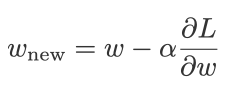

[-0.7194813  0.7194813]


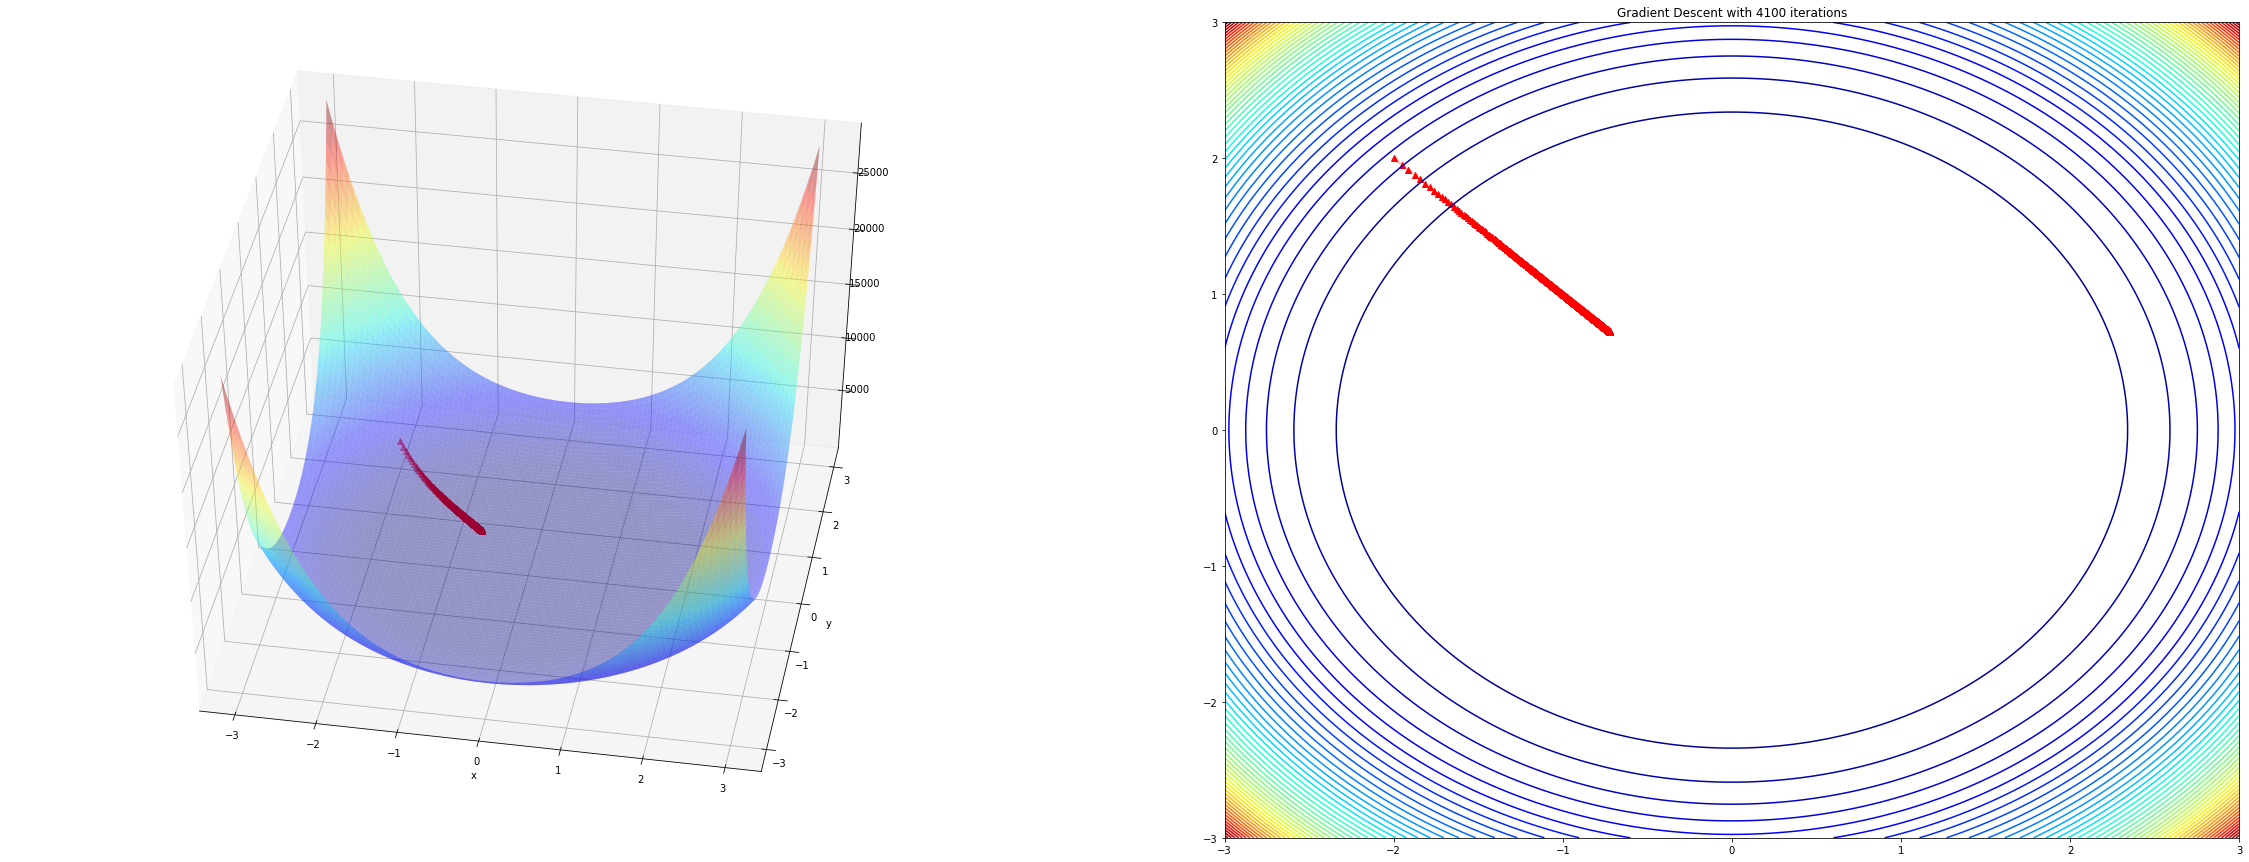

In [ ]:
root, iter_x, iter_y, iter_count = gradient_descent(grad_new_funct,-2,2,typ='vanilla')
plot_results(iter_x, iter_y, iter_count)

## Polyak's momentum based gradient descent  
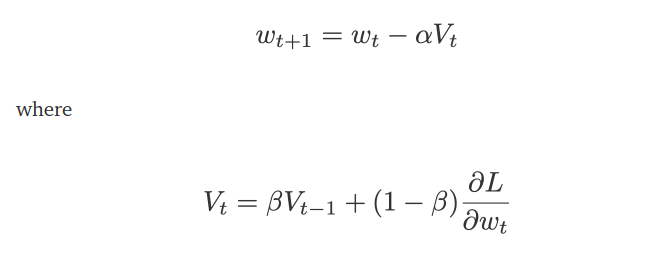

[-0.71941073  0.71941073]


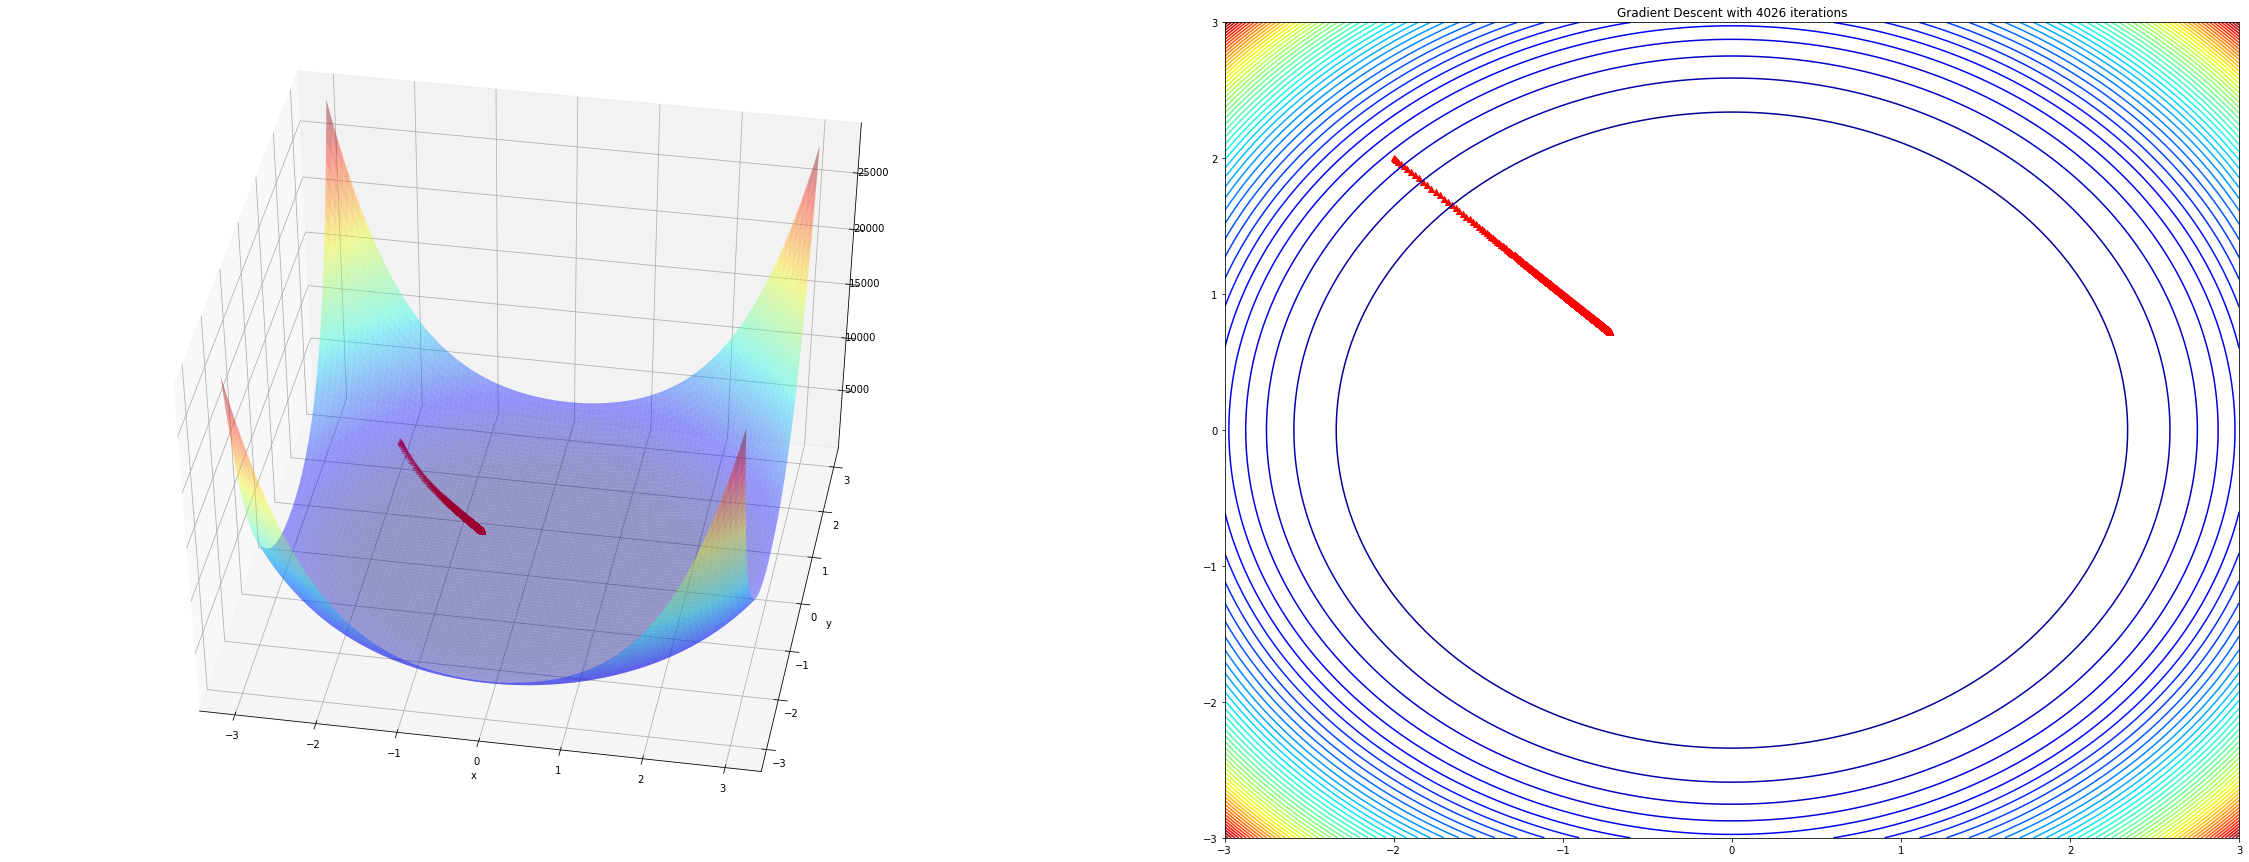

In [ ]:
root, iter_x, iter_y, iter_count = gradient_descent(grad_new_funct,-2,2,typ='momentum')
plot_results(iter_x, iter_y, iter_count)

## Nesterov accelerated gradient descent  
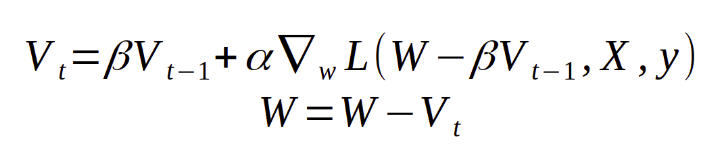


[-0.70712008  0.70712008]


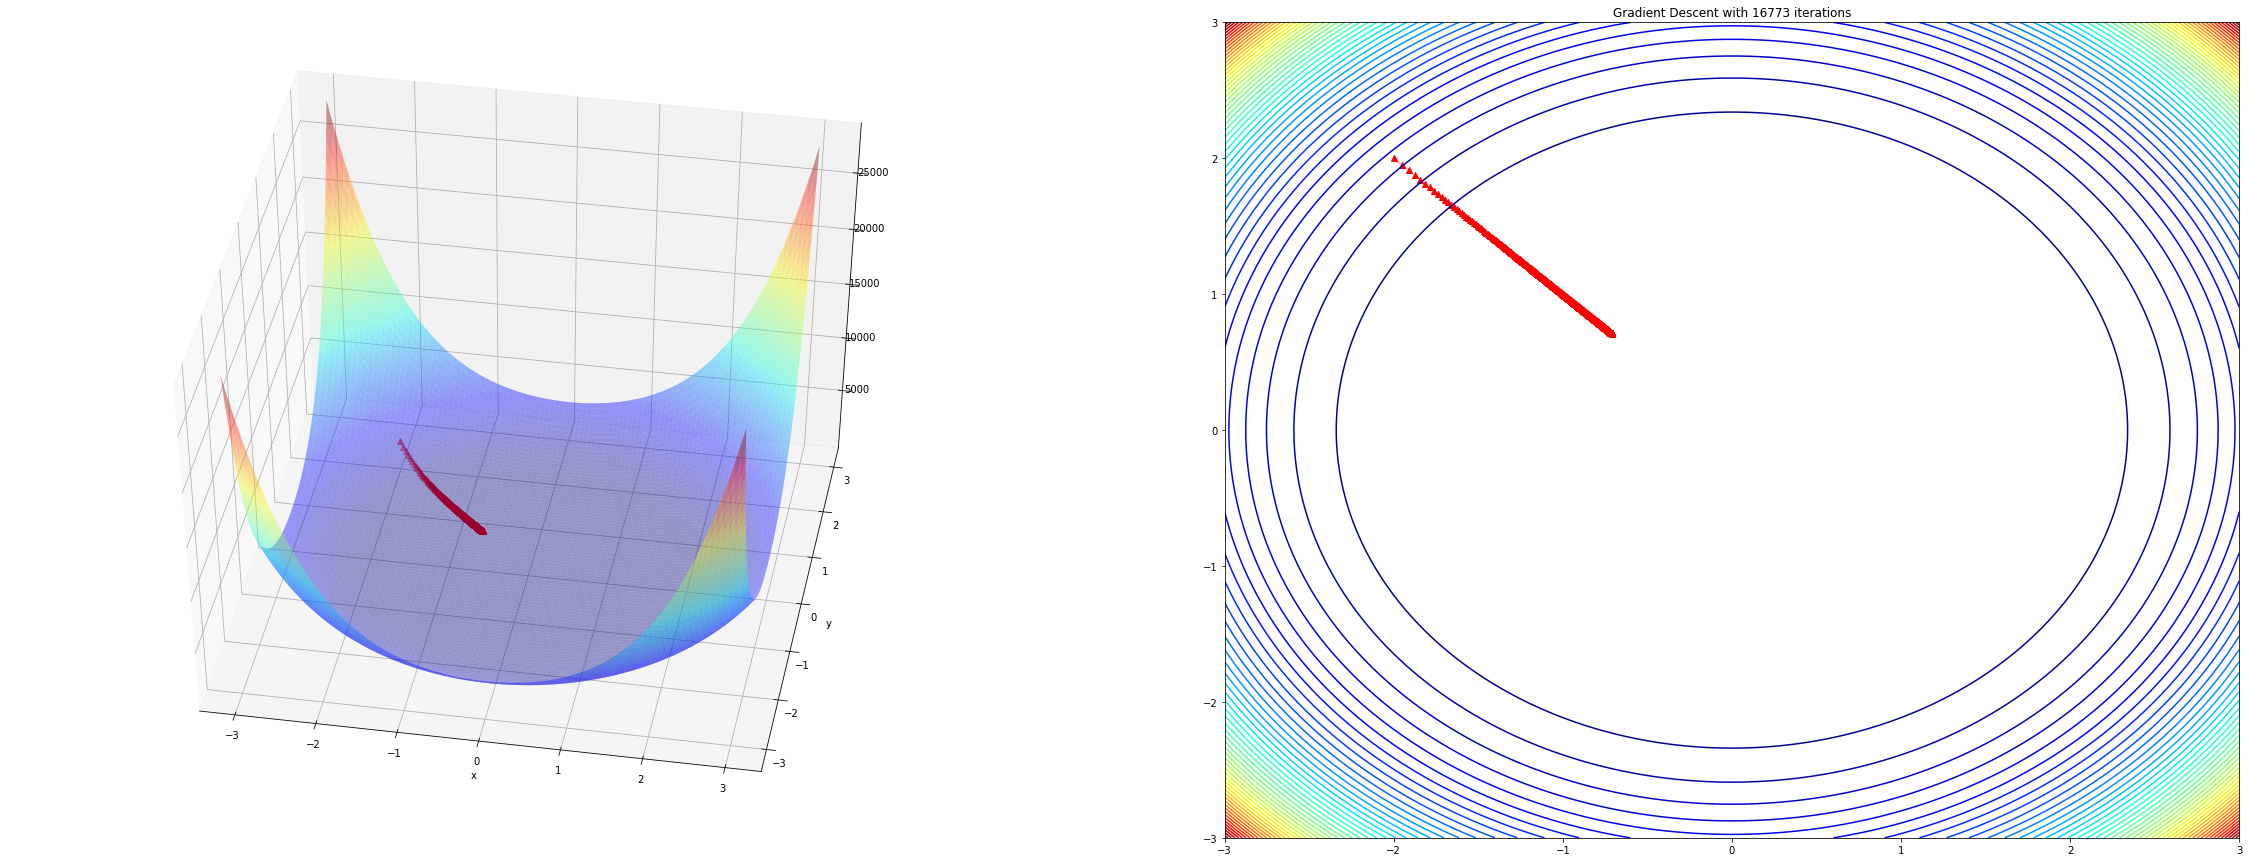

In [ ]:
root, iter_x, iter_y, iter_count = gradient_descent(grad_new_funct,-2,2,typ='nestrov')
plot_results(iter_x, iter_y, iter_count)

## Adam optimizer  
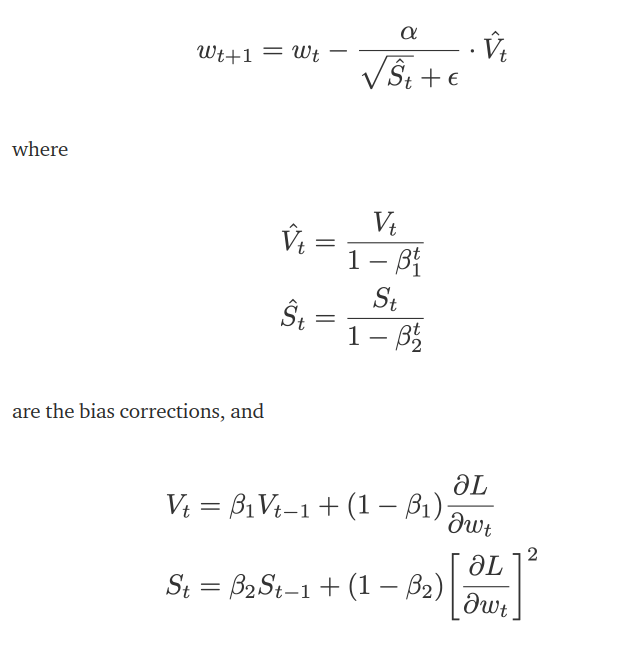

[-0.70710799  0.70710799]


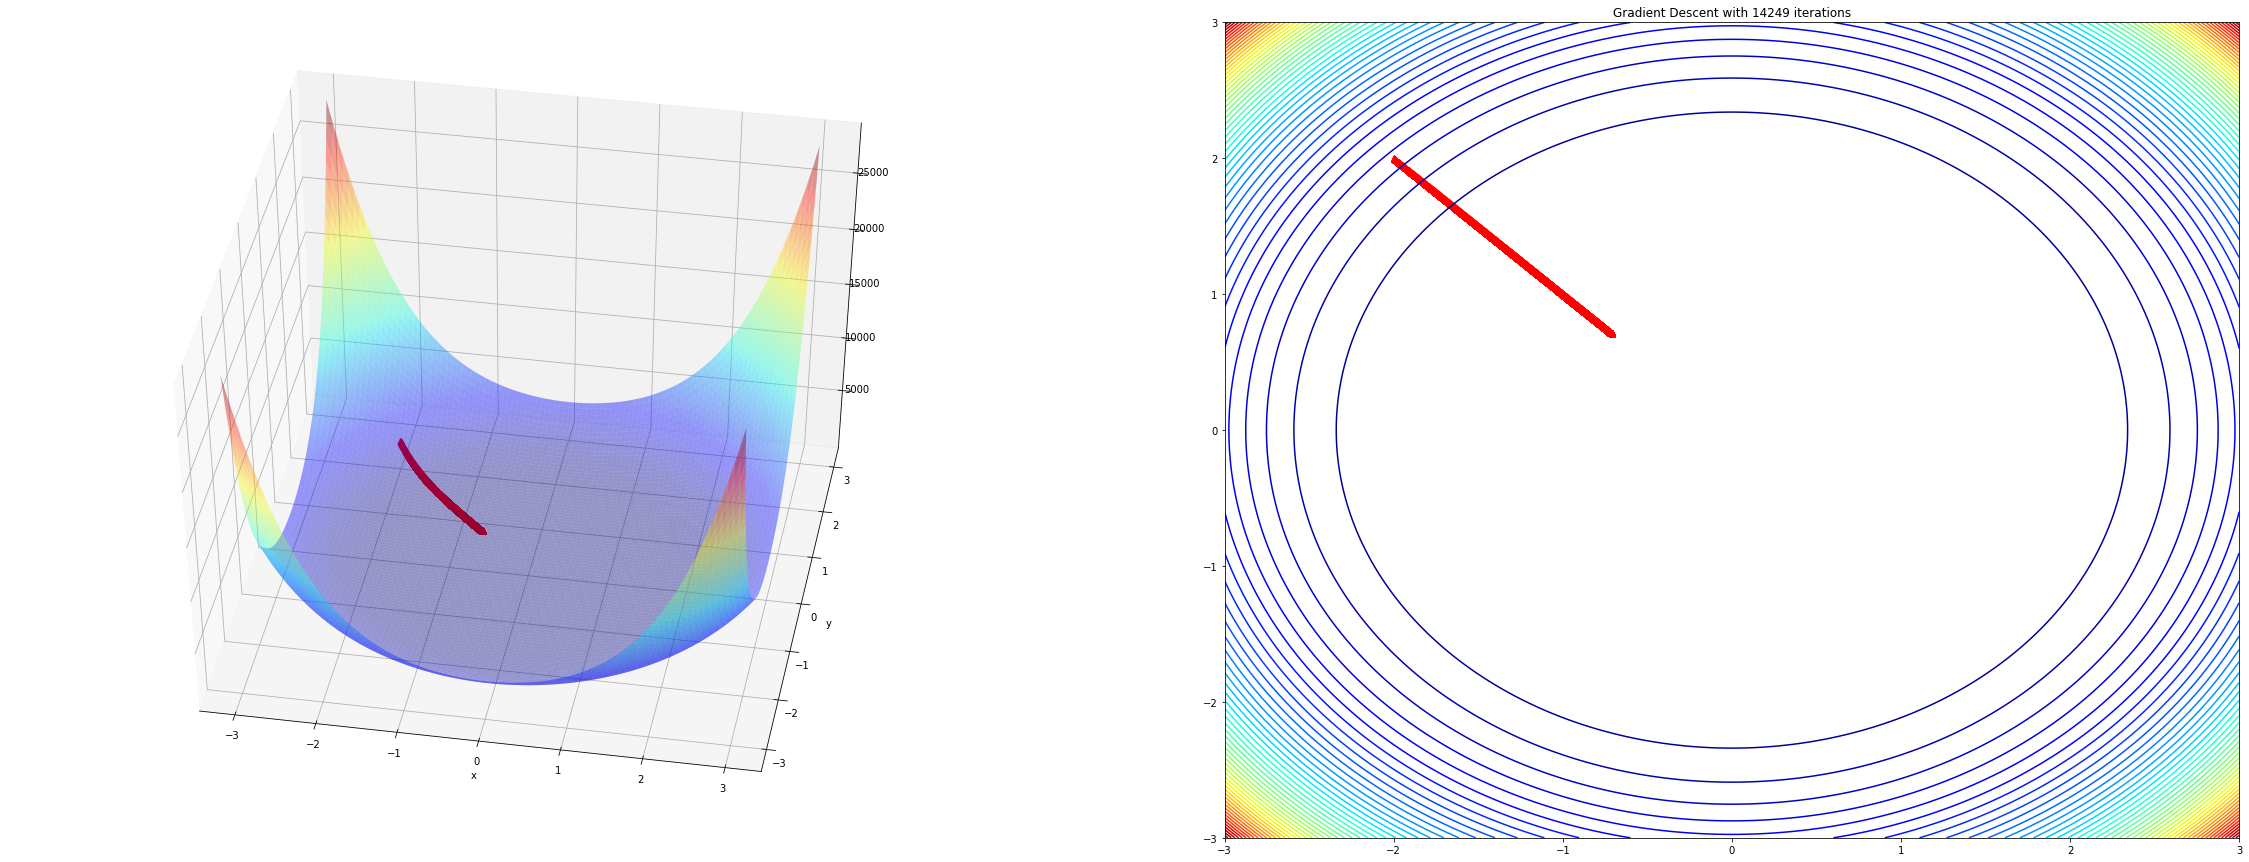

In [ ]:
root, iter_x, iter_y, iter_count = gradient_descent(grad_new_funct,-2,2,typ='adam')
plot_results(iter_x, iter_y, iter_count)